In [1]:
!pip install "pandas[excel]"
!pip install numpy
!pip install seaborn
!pip install matplotlib==3.7.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random
import matplotlib.pyplot as plt

import math
import datetime
from datetime import date,datetime
from datetime import timedelta
import re
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
#import missingno as msno

import warnings
warnings.filterwarnings("ignore")



In [3]:
#Reading the Dataset
xls = pd.ExcelFile('Cardiac_Outcomes.xlsx')
#Reading the Hospitalization_Discharge sheet
df_HD = pd.read_excel(xls, 'Hospitalization_Discharge')
#Reading the CardiacComplications sheet
df_CC = pd.read_excel(xls, 'CardiacComplications')
#Reading the Responsivenes sheet
df_R= pd.read_excel(xls, 'Responsivenes')
#Reading the PatientHistory sheet
df_PH = pd.read_excel(xls, 'PatientHistory')
#Reading the Labs sheet
df_L = pd.read_excel(xls, 'Labs')
#Reading the Demography sheet
df_D = pd.read_excel(xls, 'Demography')
#Reading the Patient_Precriptions sheet
df_PP = pd.read_excel(xls, 'Patient_Precriptions')

# Q17 Using arrays and loops find the number of patients who were Admitted in the month of November

In [4]:
count = 0
for addmissionDate in pd.to_datetime(df_HD["Admission_date"]):
    if (addmissionDate.month == 11): # 11 is November month
        count = count + 1

print('Number patients addmitted in month of November: {}'.format(count))


Number patients addmitted in month of November: 195


# Q18	Create a heatmap on any columns of your choice including at least 1 lab value

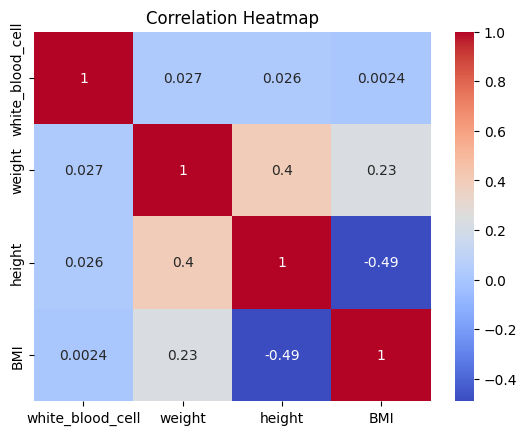

In [5]:
df_merge_heatmap = pd.merge(df_L[['inpatient_number','white_blood_cell']], df_D[['inpatient_number','weight','height','BMI']], on=['inpatient_number'])

# Calculate correlation matrix
correlation_matrix = df_merge_heatmap[['white_blood_cell','weight','height','BMI']].corr()

# Plotting heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Adding title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


# Q19	Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

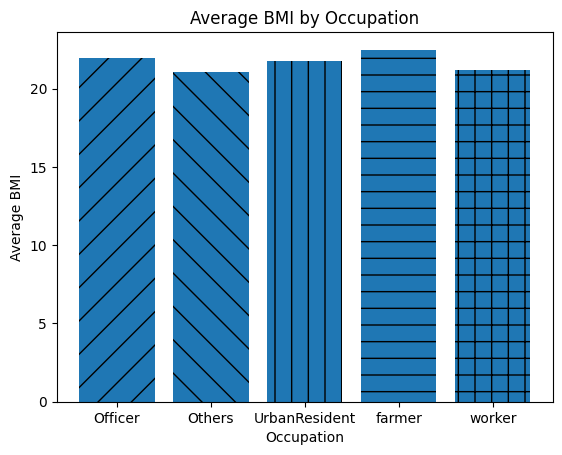

In [6]:
# Sample data (replace with your actual data)
avg_bmi_by_occupation = df_D.groupby('occupation')['BMI'].mean().to_dict()

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(avg_bmi_by_occupation.keys(), avg_bmi_by_occupation.values())

# Add hatch patterns to the bars
hatches = ['/', '\\', '|','-', '+']
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Adding labels and title
ax.set_xlabel('Occupation')
ax.set_ylabel('Average BMI')
ax.set_title('Average BMI by Occupation')

# Display the plot
plt.show()

# Q20	You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n.  
Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n.  
x=1, y=1, z=2, n=3



In [7]:
x = 1
y = 1
z = 2
n = 3

coordinates = []

for i in range(x + 1):
    for j in range(y + 1):
        for k in range(z + 1):
            if i + j + k != n:
                coordinates.append([i, j, k])

print(coordinates)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]]


# Q21	Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any student(s) having the second lowest grade.
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

In [8]:
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
python_students.sort(key = lambda x: x[1])
print('Sorted Array: {}'.format(python_students))
print('Second lowest grade: {}'.format(python_students[2][1]))

gradeValue = python_students[2][1]
for student_grade in python_students:
    if (student_grade[1] == gradeValue):
        print('Students with second lowest grade: {}'.format(student_grade[0]))


Sorted Array: [['Tina', 37.2], ['Harry', 37.21], ['Berry', 37.21], ['Harsh', 39], ['Akriti', 41]]
Second lowest grade: 37.21
Students with second lowest grade: Harry
Students with second lowest grade: Berry


# Q22	Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [9]:
patient_with_max_drugs = df_PP['inpatient_number'].value_counts().idxmax()
patient_age = df_D[df_D['inpatient_number']==patient_with_max_drugs]['ageCat'].values[0]
patient_outcome = df_HD[df_HD['inpatient_number']==patient_with_max_drugs]['outcome_during_hospitalization'].values[0]

print('Patient with max durgs: {}'.format(patient_with_max_drugs))
print('Patient age: {}'.format(patient_age))
print('Patient outcome during hospitalization: {}'.format(patient_outcome))


Patient with max durgs: 777204
Patient age: 79-89
Patient outcome during hospitalization: Alive


# Q23 How many patients were prescribed Digoxin?

In [10]:
print('patients were prescribed Digoxin: {}'.format(df_PP[df_PP['Drug_name'].str.contains('Digoxin')].shape[0]))

patients were prescribed Digoxin: 999


# Q24	What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

Low value of hemoglobin indicate a presence of anemia


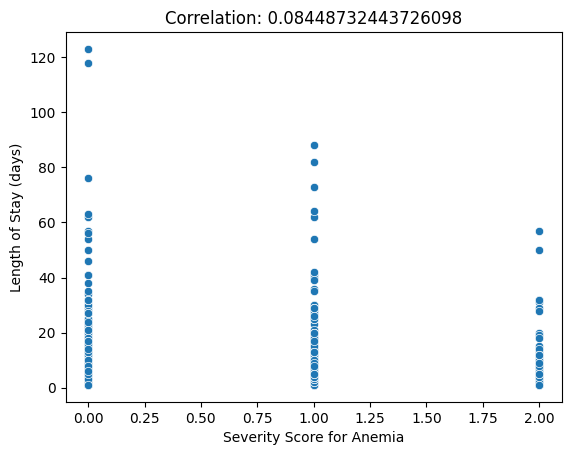

In [11]:
print('Low value of hemoglobin indicate a presence of anemia')

# Merging 'hematocrit' and 'dischargeDay' on'inpatient_number' to maintain data accuracy
df_hg_discharge_day = pd.merge(df_L[['inpatient_number','hemoglobin']], df_HD[['inpatient_number','dischargeDay']], on=['inpatient_number'])

# Create a severity score for anemia based on hematocrit levels
def severity_score(hemoglobin):
    if hemoglobin < 70:
        return 2  # Severe anemia
    elif hemoglobin < 100:
        return 1  # anemia
    else:
        return 0  # Normal

df_hg_discharge_day['Severity Score'] = df_hg_discharge_day['hemoglobin'].apply(severity_score)

# Calculate correlation
correlation = df_hg_discharge_day['Severity Score'].corr(df_hg_discharge_day['dischargeDay'])

# Plotting
sns.scatterplot(data=df_hg_discharge_day, x='Severity Score', y='dischargeDay')
plt.title(f'Correlation: {correlation}')
plt.xlabel('Severity Score for Anemia')
plt.ylabel('Length of Stay (days)')
plt.show()

# Q25	Using GCS score, how many patients are considered to be in a coma?

In [12]:
coma_gcs_score = 15
patients_in_coma = df_R[df_R['GCS'] == coma_gcs_score].shape[0];
print('Coma GCS score: {}'.format(coma_gcs_score))
print('Number of patients in coma: {}'.format(patients_in_coma))

Coma GCS score: 15
Number of patients in coma: 1951


# Q26	Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [13]:
df_D_Copy = df_D.copy()
df_D_Copy

# Create a severity score for anemia based on hematocrit levels
def generate_age(ageCategory):
    # Parse the range string
    lower_bound, upper_bound = map(int, ageCategory.split('-'))
    # Generate a random number within the specified range
    return random.randint(lower_bound, upper_bound)

df_D_Copy['age'] = df_D_Copy['ageCat'].apply(generate_age)

print('The average age of the patients: {}'.format(int(df_D_Copy['age'].mean())))


The average age of the patients: 74



# Q27	Using the age column generated in Q.26, calculate year of birth for each patient

In [14]:
def cal_birth_year(age):    
    # Current year
    current_year = datetime.now().year
    # Generate a random number within the specified range
    return current_year - age

df_D_Copy['birth_year'] = df_D_Copy['age'].apply(cal_birth_year)
df_D_Copy.head()

,inpatient_number,gender,weight,height,BMI,occupation,ageCat,age,birth_year
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,69,1955
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,76,1948
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,64,1960
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,71,1953
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,77,1947


# Q28	Store patient number and gender in a dictionary as a pair of values. Show the first 10 values


In [15]:
patient_gender_dict = dict(zip(df_D['inpatient_number'], df_D['gender']))

count = 0
for item in patient_gender_dict.items():
    if count == 10:
        break;
    count = count + 1
    print(item)

(857781, 'Male')
(743087, 'Female')
(866418, 'Male')
(775928, 'Male')
(810128, 'Female')
(823318, 'Female')
(844094, 'Male')
(787530, 'Female')
(795420, 'Female')
(829801, 'Female')


# Q29	What percentage of those in a coma also have diabetes?

In [16]:
df_coma_diabetes =  pd.merge(df_R[df_R['GCS'] == coma_gcs_score], df_PH[df_PH['diabetes']==1], on=['inpatient_number'])
diabetes_count_in_coma = df_coma_diabetes.shape[0]
print('Number of patients in coma with diabetes: {}'.format(diabetes_count_in_coma))
print('Percentage of patients in coma with diabetes: {}'.format((diabetes_count_in_coma/patients_in_coma)*100))

Number of patients in coma with diabetes: 456
Percentage of patients in coma with diabetes: 23.37262942080984


# Q30	Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

# Q31	Group the days to re-admission into bins and count how many patients were in each bin

In [17]:
df_re_admission = df_HD.copy()

# Function to map values to days
def map_re_admission(row):
    if row['re_admission_within_28_days'] == 1:
        return 28
    elif row['re_admission_within_3_months'] == 1:
        return 90
    elif row['re_admission_within_6_months'] == 1:
        return 180
    else:
        return 0

# Create the new column 'readmission_in_days' using apply
df_re_admission['readmission_in_days'] = df_re_admission.apply(lambda row: map_re_admission(row), axis=1)

# Define bins for days to re-admission
bins = [0, 28, 90, 180]

# Group days to re-admission into bins and count patients in each bin
bin_counts = pd.cut(df_re_admission['readmission_in_days'], bins=bins).value_counts().sort_index()

# Display the counts in each bin
print("Counts for re-admission:")
print(bin_counts)


Counts for re-admission:
readmission_in_days
(0, 28]      140
(28, 90]     358
(90, 180]    278
Name: count, dtype: int64


# Q32	Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

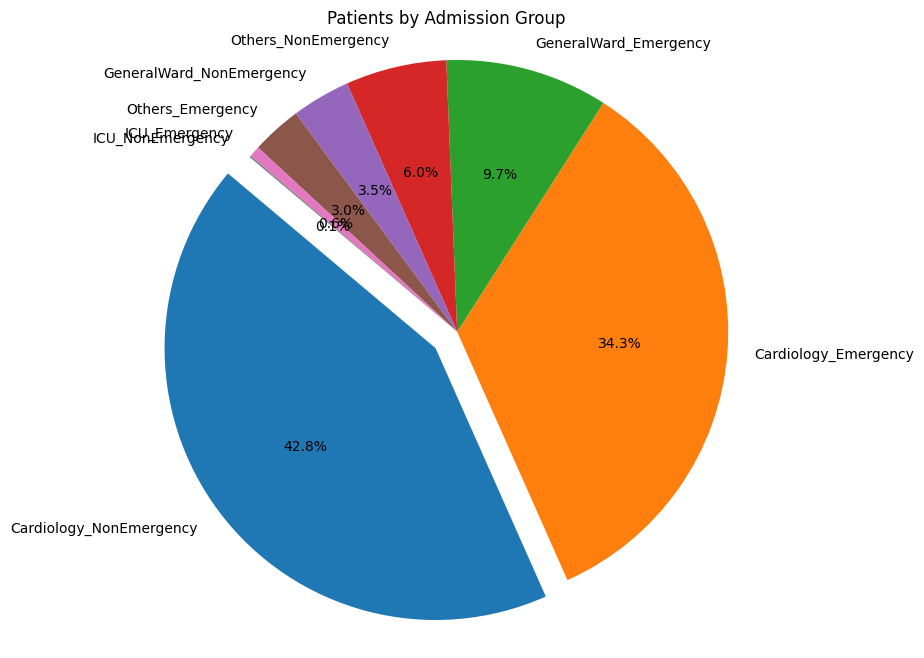

In [18]:
df_addmission_grp = df_HD.copy()

df_addmission_grp['admission_group'] = df_addmission_grp['admission_ward'] + '_' + df_addmission_grp['admission_way']

# Count the number of patients in each group
group_counts = df_addmission_grp['admission_group'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
explode = [0.1 if idx == group_counts.idxmax() else 0 for idx in group_counts.index]
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Patients by Admission Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

# Q33	Retrieve the row with minimum white_blood_cell count using sorting technique.

In [19]:
df_L_Sorted = df_L.sort_values(by='white_blood_cell')
row_with_min_wbc = df_L_Sorted.iloc[0]

print("Row with minimum white_blood_cell count:")
row_with_min_wbc

Row with minimum white_blood_cell count:


inpatient_number           746068.00
body_temperature               37.10
pulse                          71.00
respiration                    20.00
systolic_blood_pressure       130.00
                             ...    
partial_oxygen_pressure        95.00
oxyhemoglobin                  96.30
anion_gap                      16.80
free_calcium                    1.11
total_hemoglobin               94.00
Name: 865, Length: 107, dtype: float64

# Q34	get the last letter of discharge_department of patients using RegEX

In [20]:

# Extract the last letter of 'discharge_department' using regex
df_HD['last_letter'] = df_HD['discharge_department'].str.extract(r'(.)$')

df_HD[['discharge_department','last_letter']].head()

,discharge_department,last_letter
0,Cardiology,y
1,Cardiology,y
2,Cardiology,y
3,Cardiology,y
4,Cardiology,y
